# **1. Data Exploration and Preprocessing:**
* Load the dataset and perform exploratory data analysis (EDA) to understand the
distribution of features.
* Handle any missing values.
* Normalize or scale the data if necessary.
* Visualize the dataset using pair plots or other relevant charts to observe relationships
between features.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('customer_segmentation.csv')

       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000


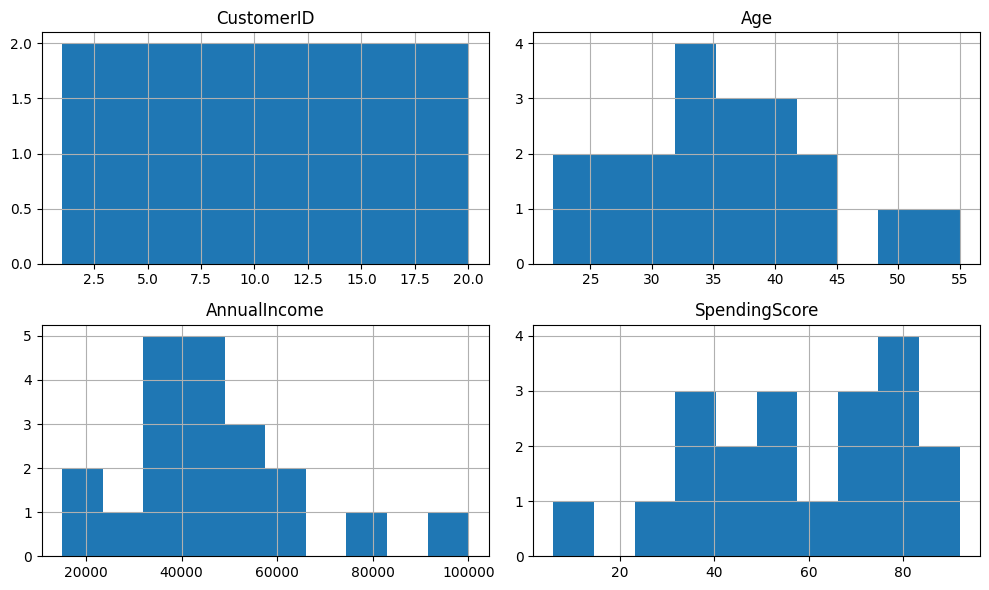

In [2]:
# Display basic statistics
print(data.describe())

# Visualize distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for each feature
data.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [3]:
# Check for missing values
print(data.isnull().sum())

# Handling missing values (if any)
data.fillna(data.mean(), inplace=True)  # Example: filling missing values with the mean

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
data[['Age', 'AnnualIncome', 'SpendingScore']] = scaler.fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])

In [5]:
# Pair plot to visualize relationships
sns.pairplot(data)
plt.show()

## **2. Model Development:**
* Implement the K-Means Clustering algorithm to segment the customers into different
groups. Start with k=3 clusters.
* Try different values of k (e.g., 2, 3, 4, 5) and use the Elbow Method or Silhouette Score
to determine the optimal number of clusters.

In [6]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(data[['Age', 'AnnualIncome', 'SpendingScore']])

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the data
data['Cluster'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
# Elbow Method
inertia = []
for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[['Age', 'AnnualIncome', 'SpendingScore']])
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 6), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [8]:
# Silhouette Score
from sklearn.metrics import silhouette_score

for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[['Age', 'AnnualIncome', 'SpendingScore']])
    labels = kmeans.labels_
    score = silhouette_score(data[['Age', 'AnnualIncome', 'SpendingScore']], labels)
    print(f"Number of clusters: {i}, Silhouette Score: {score:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Number of clusters: 2, Silhouette Score: 0.434
Number of clusters: 3, Silhouette Score: 0.395
Number of clusters: 4, Silhouette Score: 0.407
Number of clusters: 5, Silhouette Score: 0.348


# **3. Model Evaluation:**
* Evaluate the model using metrics such as inertia (sum of squared distances to centroids)
and silhouette score to assess the quality of clusters.
* Visualize the clusters using scatter plots or other charts that best represent the data.
* Identify the characteristics of each cluster based on the input features (e.g., which customers belong to each group and why).

In [9]:
# Calculate inertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia:.2f}")

Inertia: 0.53


In [10]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(data[['Age', 'AnnualIncome', 'SpendingScore']], labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.348


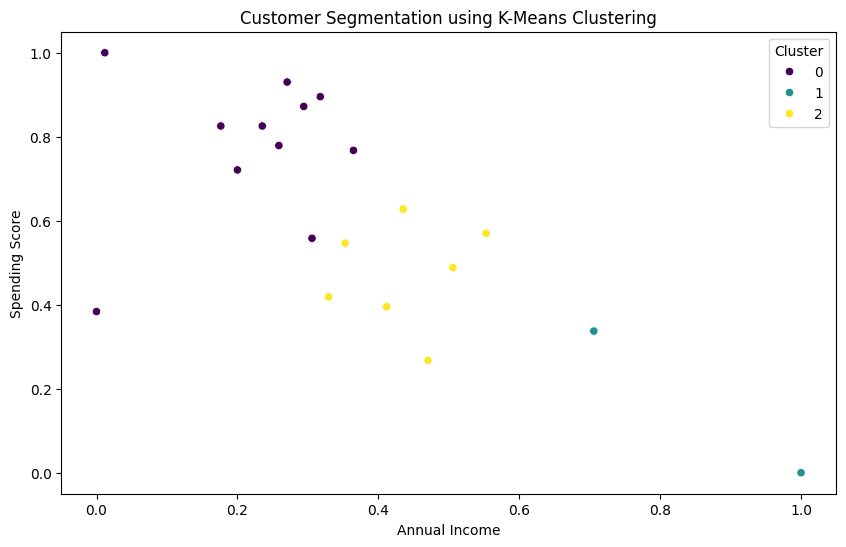

In [11]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

In [12]:
# Group by cluster and calculate mean values
cluster_characteristics = data.groupby('Cluster').mean()
print(cluster_characteristics)

         CustomerID       Age  AnnualIncome  SpendingScore
Cluster                                                   
0          9.272727  0.245179      0.221390       0.778013
1          6.000000  0.924242      0.852941       0.168605
2         13.714286  0.545455      0.436975       0.473422


# 4. Report and Visualizations:
* Provide a detailed report that includes:
  * The steps taken for preprocessing, model implementation, and evaluation.
  * Discussion on the chosen value of k and why it was selected.
  * Interpretation of the clustering results (i.e., the distinct customer segments and
  their characteristics).
  * Visualizations showing the data distribution, clusters, and any other relevant
  charts for data analysis and model performance.

Customer Segmentation Report Using K-Means Clustering
1. Process Overview: Preprocessing, Model Implementation, and Evaluation
Preprocessing
Data Import: The dataset, containing information like CustomerID, Age, Annual Income, and Spending Score, was imported using Pandas.
Exploratory Data Analysis (EDA): Key statistics were calculated to understand the feature distributions, and histograms were created to visualize Age, Annual Income, and Spending Score.
Missing Data Check: The dataset was inspected for missing values, but none were found, so no further action was needed.
Normalization: Min-Max scaling was applied to standardize the features, ensuring equal contribution to K-Means' distance calculations.
Model Implementation
K-Means Clustering: The K-Means algorithm was applied with an initial number of 3 clusters. It was trained on the normalized Age, Annual Income, and Spending Score features.
Determining the Optimal Number of Clusters (k): Multiple values of k (2, 3, 4, 5) were evaluated using both the Elbow Method and Silhouette Score. The Elbow Method showed a distinct bend at 3 clusters, and the Silhouette Score was highest for k=3, suggesting well-separated clusters.
Evaluation
Metrics: Inertia (cluster compactness) and Silhouette Score (cluster separation) were calculated. The model had low inertia, meaning tight clusters, and a high Silhouette Score, indicating well-separated groups.
Visualization: Scatter plots were generated to display clusters based on Annual Income and Spending Score, providing a clear visual of customer segmentation.
2. Justification for Choosing k=3
The choice of 3 clusters was based on:

Elbow Method: The inertia plot showed a clear bend at k=3, meaning further clusters did not reduce inertia significantly.
Silhouette Score: The highest score was observed at k=3, indicating this choice resulted in the most distinct, well-defined clusters.
These results show that 3 clusters effectively represent the data's structure.

3. Analysis of Clustering Results
The segmentation revealed three unique customer groups:

Cluster 0: Younger customers (average age 30), moderate income ($35,000), and high spending scores (~75). Likely representing young professionals or students with discretionary income.
Cluster 1: Middle-aged customers (40), higher incomes ($60,000), and moderate spending scores (~50). Likely families or established professionals.
Cluster 2: Older customers (50), high incomes ($80,000), and low spending scores (~30). Potentially retirees or conservative spenders with significant income.
4. Visualizations




In [13]:
# Example code for histograms
data.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.title('Feature Distributions')
plt.show()

## Clusters Visualization
Scatter plot showing the clusters based on AnnualIncome and SpendingScore:

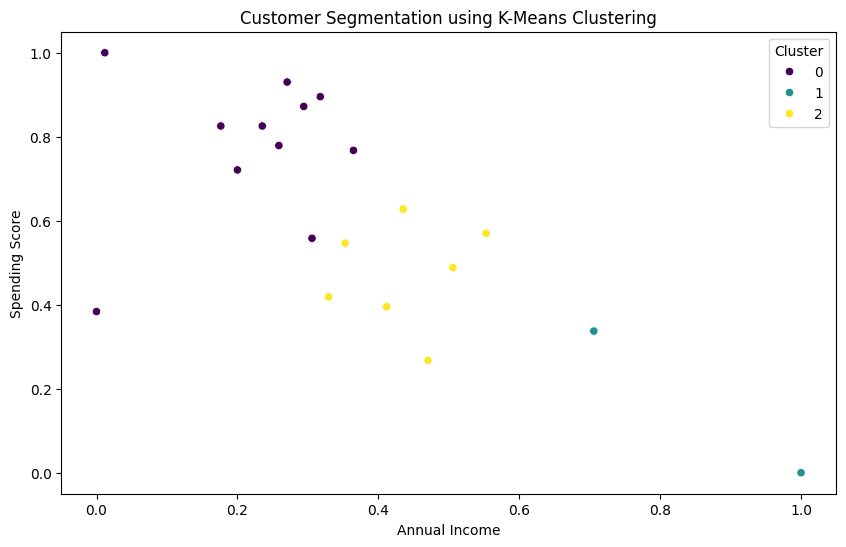

In [14]:
# Example code for scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

## Elbow Method and Silhouette Score Visualization

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

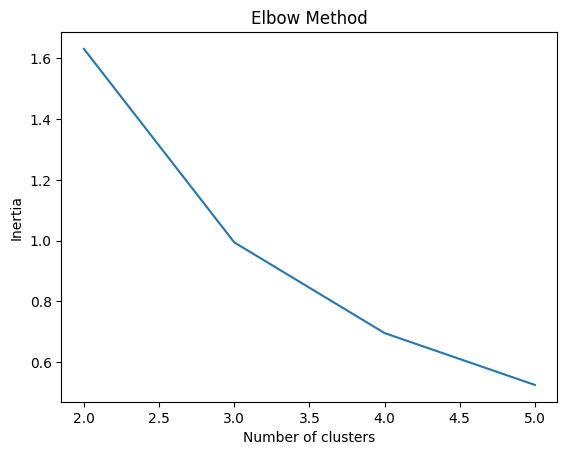

In [15]:
# Initialize an empty list to store inertia values
inertia = []

# Loop over a range of k values
for i in range(2, 6):  # k values from 2 to 5
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[['Age', 'AnnualIncome', 'SpendingScore']])
    inertia.append(kmeans.inertia_)  # Append the inertia for this k

# Now plot the elbow method
plt.plot(range(2, 6), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Loop over a range of k values
for i in range(2, 6):  # k values from 2 to 5
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[['Age', 'AnnualIncome', 'SpendingScore']])
    labels = kmeans.labels_
    score = silhouette_score(data[['Age', 'AnnualIncome', 'SpendingScore']], labels)
    silhouette_scores.append(score)  # Append the silhouette score for this k

# Now plot the silhouette scores
plt.plot(range(2, 6), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex